In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

# **데이터 불러오기 & 확인**

In [2]:
df = pd.read_csv('dataset/merge.csv')
df.head(11)

,Path,Vehicle_ID,Turn,Lane,Speed,Hazard,ISSUE_DATE,VEHICLE_ID,VEHICLE_CLASS,LONGITUDE,LATITUDE,HEADING,SPEED,BRAKE_STATUS,ACC_SEC,VEHICLE_TYPE,CURRENT_LANE,Index
0,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:41,FFE80BAA,9228.0,126.916046,35.162495,287.0,38.0,78.0,0.0,bus,0,NaN
1,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:42,FFE80BAA,9228.0,126.915924,35.162526,286.0,37.0,78.0,-28.0,bus,0,NaN
2,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:43,FFE80BAA,9228.0,126.915827,35.162551,287.0,34.0,78.0,-56.0,bus,0,NaN
3,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:44,FFE80BAA,9228.0,126.915727,35.162578,288.0,31.0,78.0,-111.0,bus,0,NaN
4,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:45,FFE80BAA,9228.0,126.915636,35.162603,288.0,29.0,78.0,-83.0,bus,0,NaN
5,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:46,FFE80BAA,9228.0,126.915555,35.162625,288.0,24.0,78.0,-111.0,bus,0,NaN
6,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:47,FFE80BAA,9228.0,126.915494,35.162643,290.0,16.0,78.0,-194.0,bus,0,NaN
7,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:48,FFE80BAA,9228.0,126.915459,35.162654,289.0,7.0,78.0,-222.0,bus,0,NaN
8,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:49,FFE80BAA,9228.0,126.915448,35.162657,289.0,0.0,78.0,-194.0,bus,4,NaN
9,V_220911_C_A_FFE80BAA_000433.csv,FFE80BAA,False,False,False,False,2022-09-11 15:32:50,FFE80BAA,9228.0,126.915448,35.162657,289.0,0.0,78.0,0.0,bus,4,NaN


In [3]:
df.columns

Index(['Path', 'Vehicle_ID', 'Turn', 'Lane', 'Speed', 'Hazard', 'ISSUE_DATE',
       'VEHICLE_ID', 'VEHICLE_CLASS', 'LONGITUDE', 'LATITUDE', 'HEADING',
       'SPEED', 'BRAKE_STATUS', 'ACC_SEC', 'VEHICLE_TYPE', 'CURRENT_LANE',
       'Index'],
      dtype='object')

In [4]:
# Index 칼럼 drop
df.drop(columns='Index', inplace=True)
df.columns

Index(['Path', 'Vehicle_ID', 'Turn', 'Lane', 'Speed', 'Hazard', 'ISSUE_DATE',
       'VEHICLE_ID', 'VEHICLE_CLASS', 'LONGITUDE', 'LATITUDE', 'HEADING',
       'SPEED', 'BRAKE_STATUS', 'ACC_SEC', 'VEHICLE_TYPE', 'CURRENT_LANE'],
      dtype='object')

In [5]:
# 결측치 확인
df.isna().sum()

Path             0
Vehicle_ID       0
Turn             0
Lane             0
Speed            0
Hazard           0
ISSUE_DATE       0
VEHICLE_ID       0
VEHICLE_CLASS    0
LONGITUDE        0
LATITUDE         0
HEADING          0
SPEED            0
BRAKE_STATUS     0
ACC_SEC          0
VEHICLE_TYPE     0
CURRENT_LANE     0
dtype: int64

# 기본 통계 분석

In [6]:
# 소수점 7자리까지 표현 설정
pd.options.display.float_format = '{:.7f}'.format

**라벨 데이터 분포 확인**

In [7]:
# 라벨 칼럼 기초통계 확인
label_columns = ['Hazard', 'Turn', 'Lane', 'Speed']
df[label_columns].describe()

,Hazard,Turn,Lane,Speed
count,46130730,46130730,46130730,46130730
unique,2,4,3,3
top,False,False,False,False
freq,45979900,42072400,38450660,45451180


In [8]:
# 각 라벨의 빈도수
for col in label_columns:
    print(f"{col} Value Counts:")
    print(df[col].value_counts())
    print("-" * 30)

Hazard Value Counts:
Hazard
False    45979900
True       150830
Name: count, dtype: int64
------------------------------
Turn Value Counts:
Turn
False      42072400
Left        1941330
Right       1929850
Reverse      187150
Name: count, dtype: int64
------------------------------
Lane Value Counts:
Lane
False     38450660
R-Side     3986660
L-Side     3693410
Name: count, dtype: int64
------------------------------
Speed Value Counts:
Speed
False    45451180
Hbrk       348700
Acc        330850
Name: count, dtype: int64
------------------------------


In [9]:
# 속성 칼럼 통계
numeric_columns = [
    'LONGITUDE', 'LATITUDE', 
    'HEADING', 'SPEED', 'BRAKE_STATUS', 
    'ACC_SEC', 'CURRENT_LANE'
    ]
df[numeric_columns].describe()

,LONGITUDE,LATITUDE,HEADING,SPEED,BRAKE_STATUS,ACC_SEC,CURRENT_LANE
count,46130730.0000000,46130730.0000000,46130730.0000000,46130730.0000000,46130730.0000000,46130730.0000000,46130730.0000000
mean,126.9207761,35.3236441,162.9235186,15.8624825,30.5285561,0.5847383,1.3683381
std,0.9003076,0.4884103,108.1504042,19.2569269,38.3927520,47.4873466,1.8320871
min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,-1806.0000000,0.0000000
25%,126.8505641,35.1419731,65.0000000,0.0000000,0.0000000,-1.0000000,0.0000000
50%,126.8872503,35.1647681,168.0000000,5.0000000,0.0000000,0.0000000,0.0000000
75%,126.9208000,35.2006200,257.0000000,30.0000000,78.0000000,0.0000000,4.0000000
max,129.4387691,38.1686125,360.0000000,589.0000000,80.0000000,2001.0000000,6.0000000


# **Hazard 칼럼 분석**

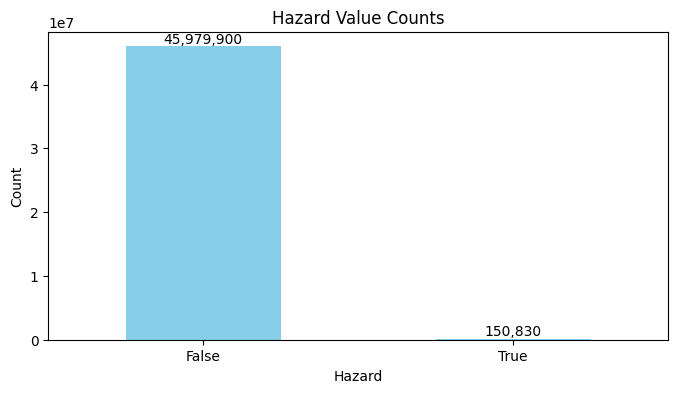

In [10]:
# Hazard 칼럼의 빈도수 시각화
hazard_counts = df['Hazard'].value_counts()
hazard_counts.plot(kind='bar', figsize=(8, 4), title='Hazard Value Counts', color='skyblue')

# 값 레이블을 추가한 그래프
ax = hazard_counts.plot(kind='bar', figsize=(8, 4), title='Hazard Value Counts', color='skyblue')
plt.xlabel('Hazard')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 값 표시
for i, count in enumerate(hazard_counts):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')

plt.show()

In [11]:
# Hazard가 True인 데이터만 필터링
condition = (df['Hazard'] == True)
hazard_true_data = df[condition]

In [12]:
hazard_true_data.head(10)

,Path,Vehicle_ID,Turn,Lane,Speed,Hazard,ISSUE_DATE,VEHICLE_ID,VEHICLE_CLASS,LONGITUDE,LATITUDE,HEADING,SPEED,BRAKE_STATUS,ACC_SEC,VEHICLE_TYPE,CURRENT_LANE
490,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:10,A4ED90F2,9228.0000000,126.8575873,35.1443615,264.0000000,7.0000000,0.0000000,28.0000000,bus,0
491,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:11,A4ED90F2,9228.0000000,126.8575611,35.1443600,264.0000000,7.0000000,0.0000000,0.0000000,bus,0
492,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:12,A4ED90F2,9228.0000000,126.8575360,35.1443575,262.0000000,7.0000000,0.0000000,28.0000000,bus,0
493,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:13,A4ED90F2,9228.0000000,126.8575096,35.1443566,266.0000000,7.0000000,0.0000000,0.0000000,bus,0
494,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:14,A4ED90F2,9228.0000000,126.8574815,35.1443570,274.0000000,9.0000000,0.0000000,28.0000000,bus,0
495,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:15,A4ED90F2,9228.0000000,126.8574531,35.1443600,281.0000000,11.0000000,0.0000000,56.0000000,bus,0
496,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:16,A4ED90F2,9228.0000000,126.8574188,35.1443725,303.0000000,13.0000000,0.0000000,56.0000000,bus,0
497,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:17,A4ED90F2,9228.0000000,126.8573871,35.1443988,325.0000000,12.0000000,0.0000000,-28.0000000,bus,0
498,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:18,A4ED90F2,9228.0000000,126.8573661,35.1444290,338.0000000,14.0000000,0.0000000,56.0000000,bus,0
499,V_220902_C_A_A4ED90F2_066801.csv,A4ED90F2,Right,R-Side,False,True,2022-09-02 13:11:19,A4ED90F2,9228.0000000,126.8573563,35.1444660,354.0000000,16.0000000,0.0000000,56.0000000,bus,0


In [13]:
total_data = len(df)
hazard_data = len(hazard_true_data)
normal_data = total_data - hazard_data

# 비율 계산
hazard_ratio = hazard_data / total_data * 100
normal_ratio = normal_data / total_data * 100

print(f"전체 데이터 개수 : {total_data}")
print(f"돌발 상황 데이터 개수 : {hazard_data}")
print(f"정상 상황 데이터 개수 : {normal_data}")
print("===============================")
print(f"돌발 상황 비율: {hazard_ratio:.2f}%")
print(f"정상 상황 비율: {normal_ratio:.2f}%")

전체 데이터 개수 : 46130730
돌발 상황 데이터 개수 : 150830
정상 상황 데이터 개수 : 45979900
돌발 상황 비율: 0.33%
정상 상황 비율: 99.67%


### **돌발 상황이 제일 많이 발생한 차량 종류는?**

In [14]:
# Hazard = True인 VEHICLE_TYPE 빈도수
vehicle_with_most_hazards = hazard_true_data['VEHICLE_TYPE'].value_counts()
vehicle_with_most_hazards

VEHICLE_TYPE
bus        102640
car         45026
special      3150
none           14
Name: count, dtype: int64

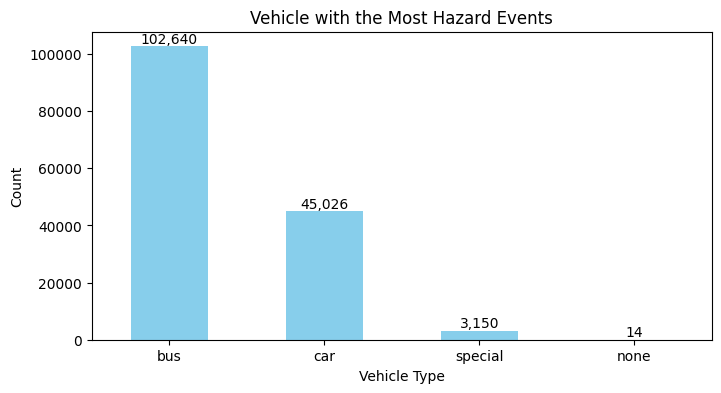

In [15]:
# 그래프 생성
vehicle_with_most_hazards.plot(kind='bar', figsize=(8, 4), title='Vehicle with the Most Hazard Events', color='skyblue')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')

# 값 표시
for i, count in enumerate(vehicle_with_most_hazards):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

bus > car > special > none 순으로 돌발 상황이 발생

bus 데이터 개수가 많기 때문에 해당 결과가 나온건지 확인

In [16]:
# 전체 데이터셋에서 차량 종류별 개수 확인
vehicle_type_counts = df['VEHICLE_TYPE'].value_counts()
vehicle_type_counts

VEHICLE_TYPE
bus         29935168
car         15132297
special      1059083
none            3762
axleCnt2         420
Name: count, dtype: int64

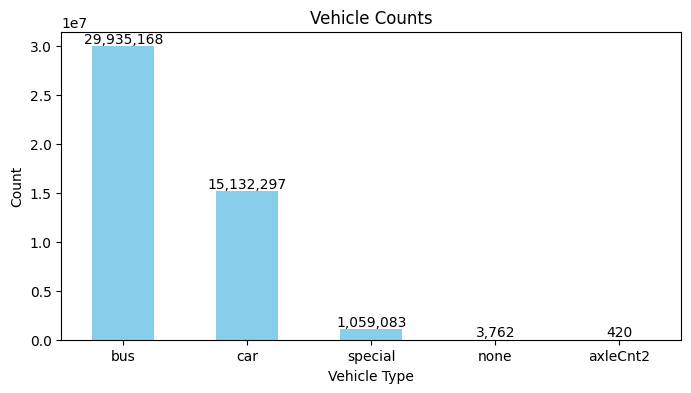

In [17]:
# 그래프 생성
vehicle_type_counts.plot(kind='bar', figsize=(8, 4), title='Vehicle Counts', color='skyblue')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')

# 값 표시
for i, count in enumerate(vehicle_type_counts):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

VEHICLE_TYPE
bus       68.0501227
car       29.8521514
special    2.0884439
none       0.0092820
Name: proportion, dtype: float64


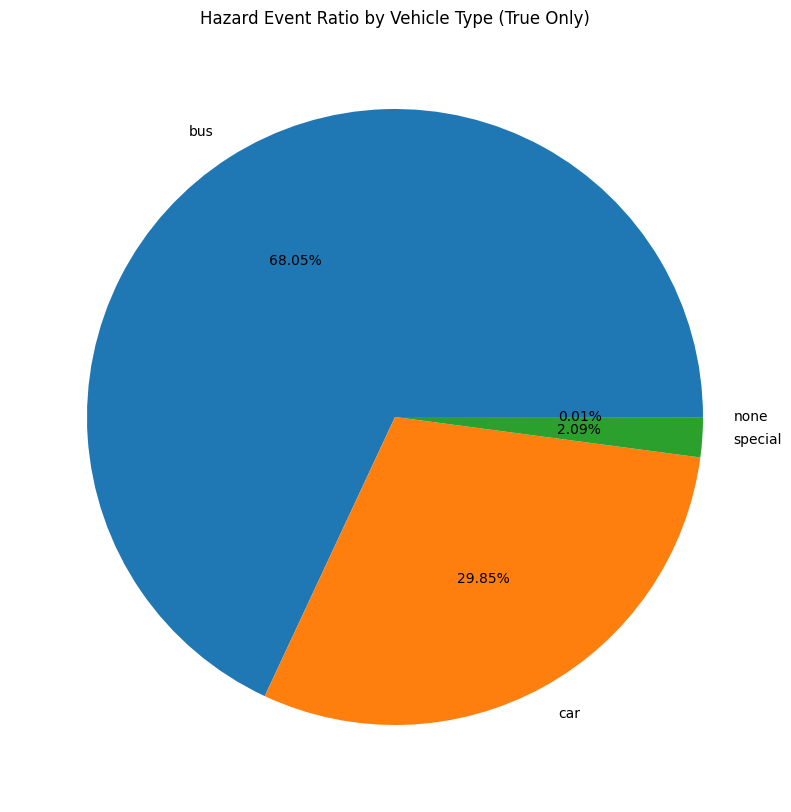

In [18]:
# VEHICLE_TYPE별 데이터의 비율 계산
hazard_true_ratio = hazard_true_data['VEHICLE_TYPE'].value_counts(normalize=True) * 100  # 퍼센트 변환

# 결과 출력
print(hazard_true_ratio)

# 파이 차트로 시각화
hazard_true_ratio.plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.2f%%',
    title='Hazard Event Ratio by Vehicle Type (True Only)',
    ylabel=''
)
plt.show()

버스에 대한 데이터가 가장 많다.

버스의 데이터가 많아서 그만큼 돌발 상황도 많은 것이라 예상

### **월별 돌발 상황 발생 비율은?**

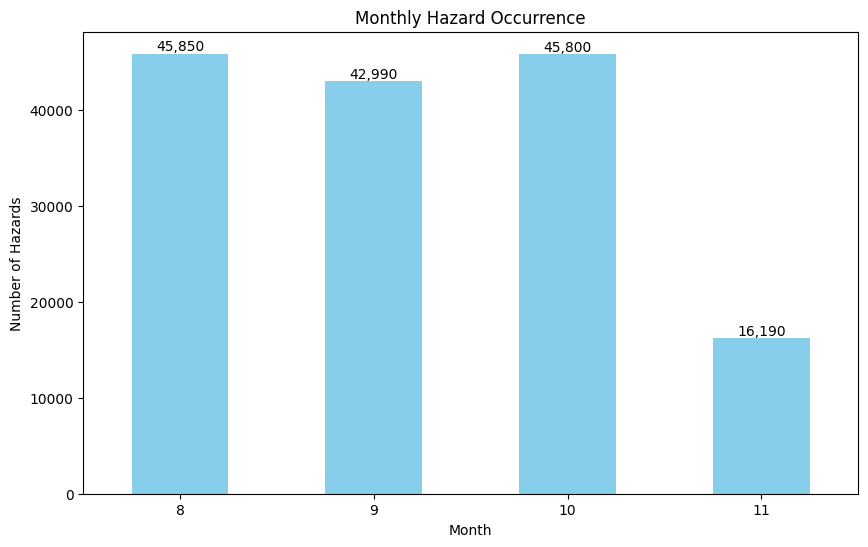

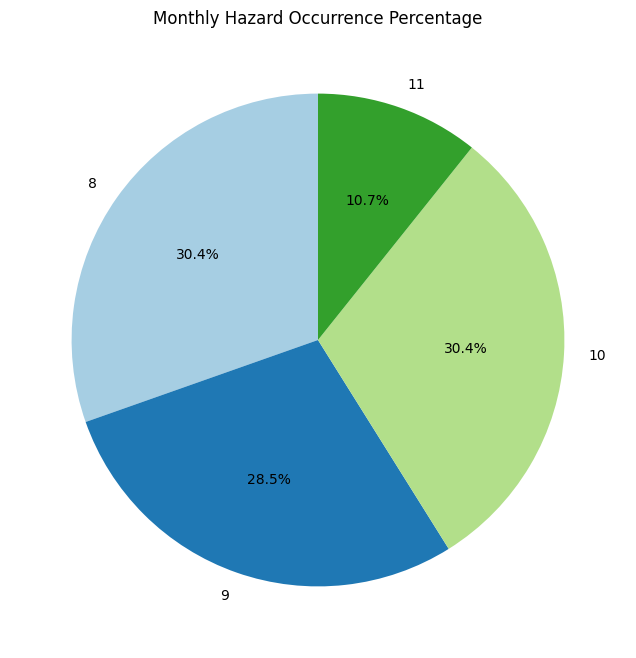

In [19]:
# ISSUE_DATE를 datetime 형식으로 변환
df['ISSUE_DATE'] = pd.to_datetime(df['ISSUE_DATE'], format='%Y-%m-%d %H:%M:%S')

# 월(Month) 추출
df['Month'] = df['ISSUE_DATE'].dt.month

# 월별 Hazard 발생 빈도
monthly_hazard = df.groupby('Month')['Hazard'].sum()

# 1. 막대 그래프 시각화
plt.figure(figsize=(10, 6))
monthly_hazard.plot(kind='bar', color='skyblue')
plt.title("Monthly Hazard Occurrence")
plt.xlabel("Month")
plt.ylabel("Number of Hazards")
plt.xticks(rotation=0)

# 값 표시
for i, count in enumerate(monthly_hazard):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')

plt.show()

# 2. 파이 차트 시각화
monthly_hazard_percentage = (monthly_hazard / monthly_hazard.sum()) * 100
plt.figure(figsize=(8, 8))
monthly_hazard_percentage.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    title="Monthly Hazard Occurrence Percentage"
)
plt.ylabel('')  # y축 레이블 제거
plt.show()

11월에서 돌발 상황 발생 비율이 가장 적음

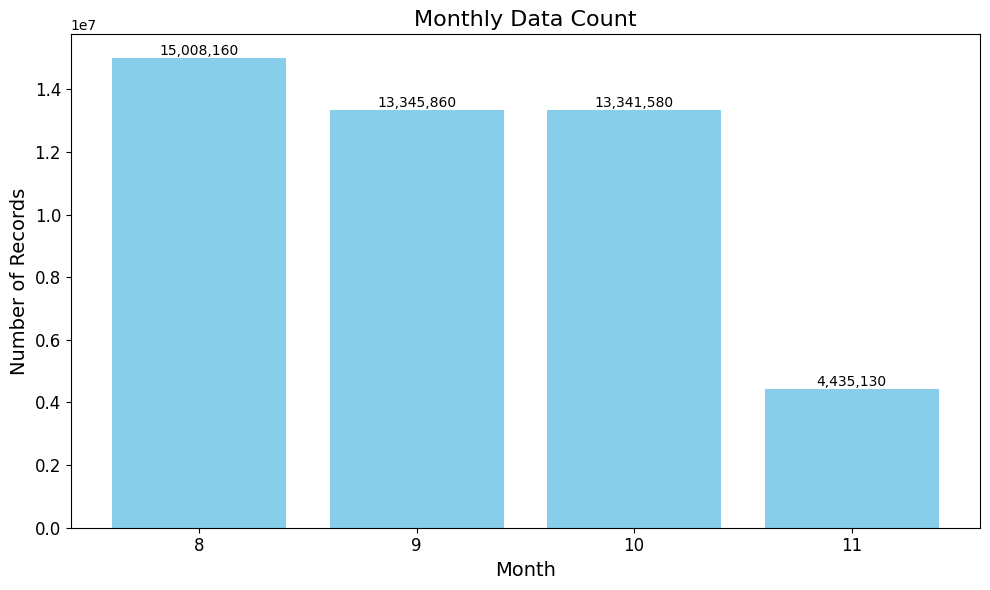

In [20]:
# 월별 데이터 개수 계산
monthly_data_count = df['Month'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(monthly_data_count.index, monthly_data_count.values, color='skyblue')
plt.title("Monthly Data Count", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Records", fontsize=14)
plt.xticks(monthly_data_count.index, fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# 값 표시
for i, count in enumerate(monthly_data_count.values):
    plt.text(monthly_data_count.index[i], count, f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # 레이아웃 조정
plt.show()

11월의 전체 데이터 개수가 적기 때문에 돌발 상황 발생 데이터 개수도 적은 것이라 예상

### **시간대별 돌발 상황 발생 비율은?**

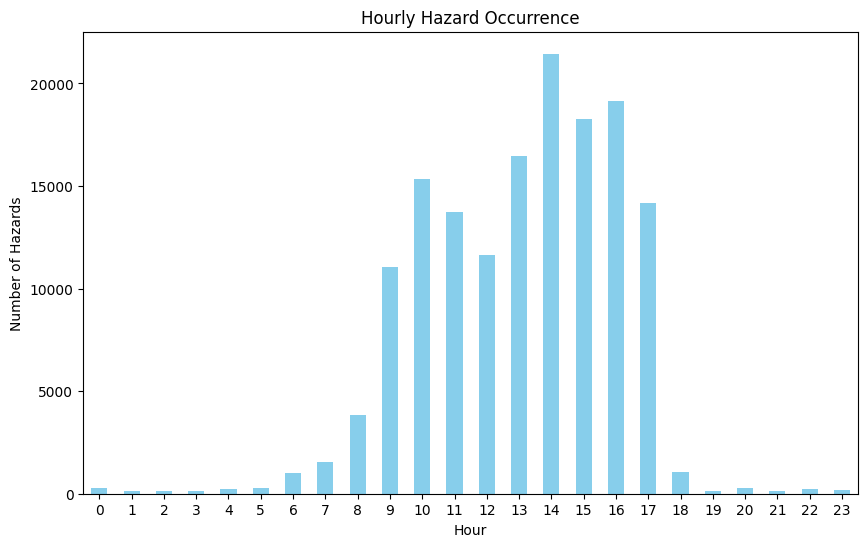

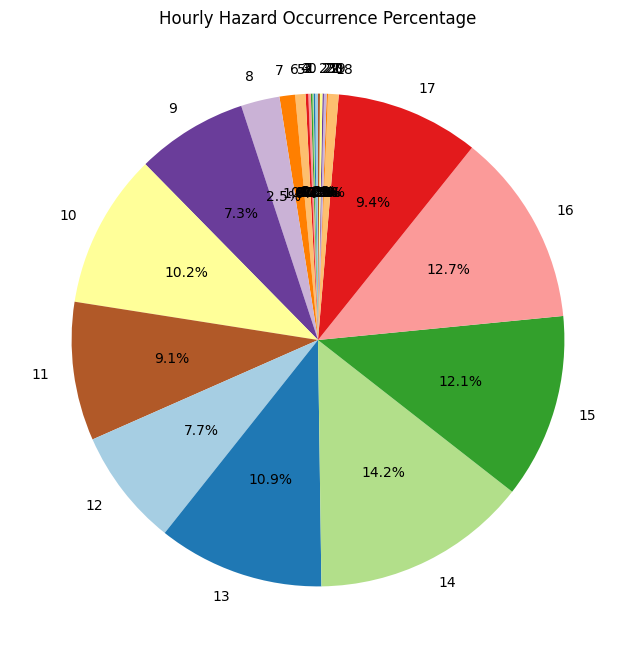

In [21]:
# 시간대(Hour) 추출
df['Hour'] = df['ISSUE_DATE'].dt.hour

# 시간대별 Hazard 발생 빈도
hourly_hazard = df.groupby('Hour')['Hazard'].sum()

# 1. 막대 그래프 시각화
plt.figure(figsize=(10, 6))
hourly_hazard.plot(kind='bar', color='skyblue')
plt.title("Hourly Hazard Occurrence")
plt.xlabel("Hour")
plt.ylabel("Number of Hazards")
plt.xticks(rotation=0)
plt.show()

# 2. 파이 차트 시각화
hourly_hazard_percentage = (hourly_hazard / hourly_hazard.sum()) * 100
plt.figure(figsize=(8, 8))
hourly_hazard_percentage.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    title="Hourly Hazard Occurrence Percentage"
)
plt.ylabel('')  # y축 레이블 제거
plt.show()

C:\Users\PEJ\AppData\Local\Temp\ipykernel_22944\1689268083.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_group_hazard = df.groupby('Time_Group')['Hazard'].sum()


Time_Group
Dawn           1220
Morning       46460
Afternoon    101120
Night          2030
Name: Hazard, dtype: int64
Time_Group
Dawn         0.8088577
Morning     30.8028907
Afternoon   67.0423656
Night        1.3458861
Name: Hazard, dtype: float64


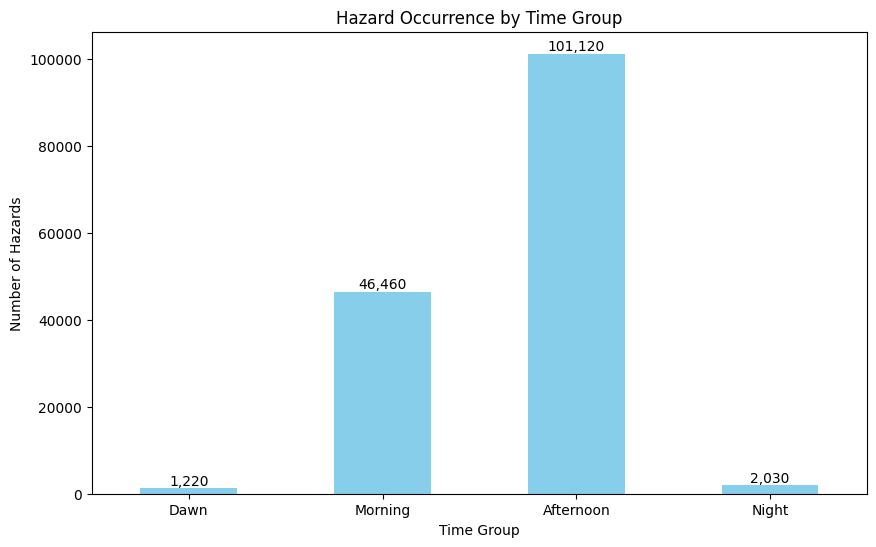

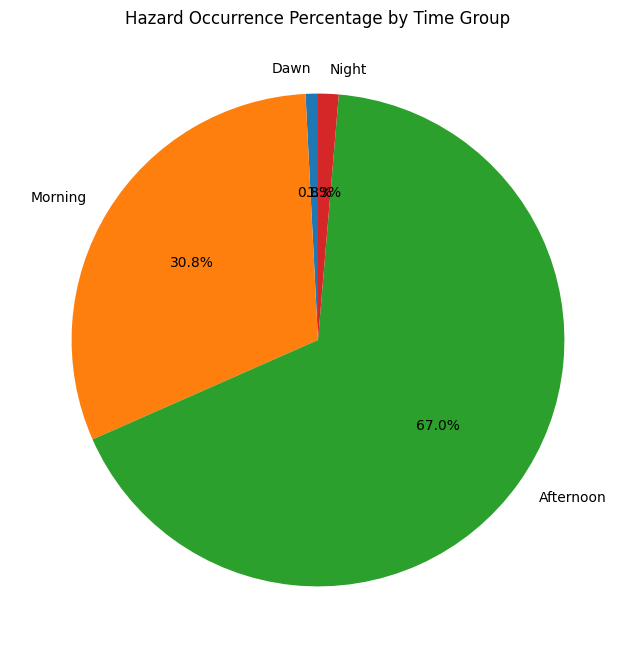

In [22]:
# 시간대 구간 설정
df['Time_Group'] = pd.cut(
    df['Hour'], # 'Hour' 열에서 시간 값을 기준으로 나눔
    bins=[0, 6, 12, 18, 24],  # 구간 설정: [0~6), [6~12), [12~18), [18~24)
    labels=['Dawn', 'Morning', 'Afternoon', 'Night'],  # 구간 이름
    right=False  # 구간의 오른쪽 경계 미포함
)

# 시간대별 Hazard 발생 빈도 계산
time_group_hazard = df.groupby('Time_Group')['Hazard'].sum()

# 비율 계산
time_group_hazard_percentage = (time_group_hazard / time_group_hazard.sum()) * 100

# 결과 출력
print(time_group_hazard)
print(time_group_hazard_percentage)

# 1. 막대 그래프 시각화
plt.figure(figsize=(10, 6))
time_group_hazard.plot(kind='bar', color='skyblue')
plt.title("Hazard Occurrence by Time Group")
plt.xlabel("Time Group")
plt.ylabel("Number of Hazards")
plt.xticks(rotation=0)

# 값 표시
for i, count in enumerate(time_group_hazard):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')
plt.show()

# 2. 파이 차트 시각화
plt.figure(figsize=(8, 8))
time_group_hazard_percentage.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    title="Hazard Occurrence Percentage by Time Group"
)
plt.ylabel('')
plt.show()

오후에 돌발 상황 발생 비율이 가장 큼

In [23]:
# 전체 데이터에서의 시간대별 개수
df['Time_Group'].value_counts()

Time_Group
Morning      18250610
Afternoon    18187370
Night         4955050
Dawn          4737700
Name: count, dtype: int64

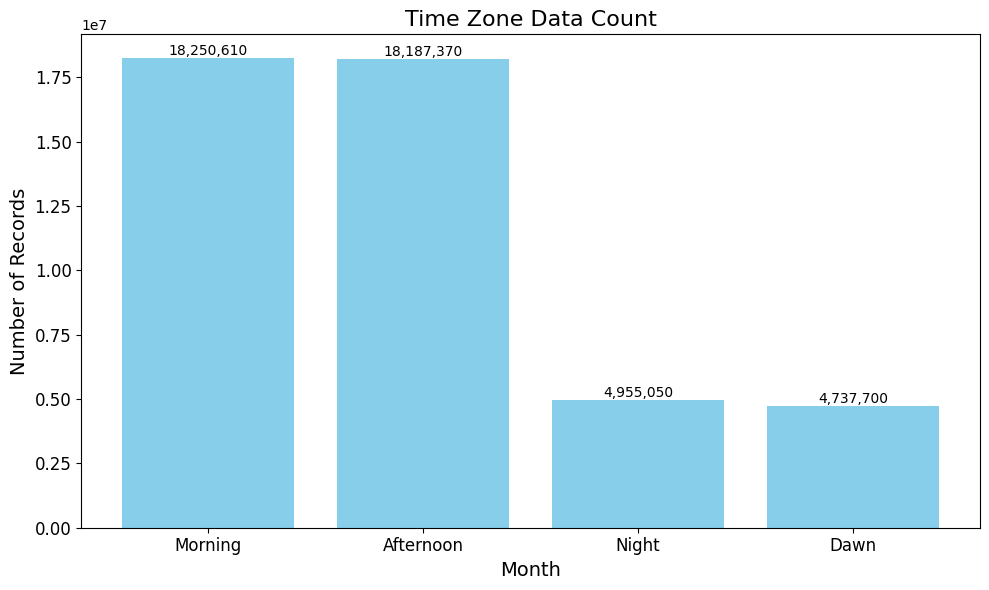

In [24]:
# 시간대별 데이터 개수 계산
time_zone_count = df['Time_Group'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기를 적절히 설정
plt.bar(time_zone_count.index, time_zone_count.values, color='skyblue')
plt.title("Time Zone Data Count", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Records", fontsize=14)
plt.xticks(time_zone_count.index, fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# 값 표시
for i, count in enumerate(time_zone_count.values):
    plt.text(time_zone_count.index[i], count, f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # 레이아웃 조정
plt.show()

오후의 전체 데이터 개수가 많으므로 돌발 상황 발생 비율도 높아진 것이라 예상

### **Boxplot 시각화**

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\880964758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Time_Group', y=col, palette='coolwarm')


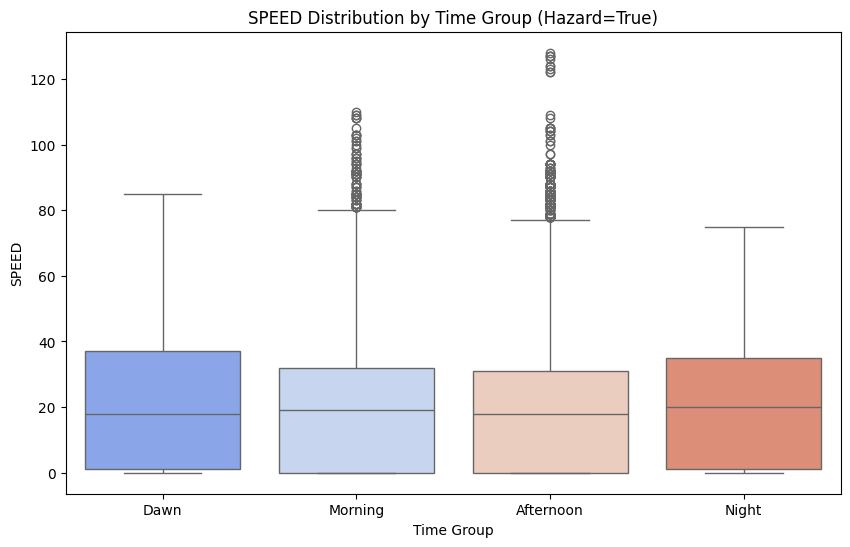

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\880964758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Time_Group', y=col, palette='coolwarm')


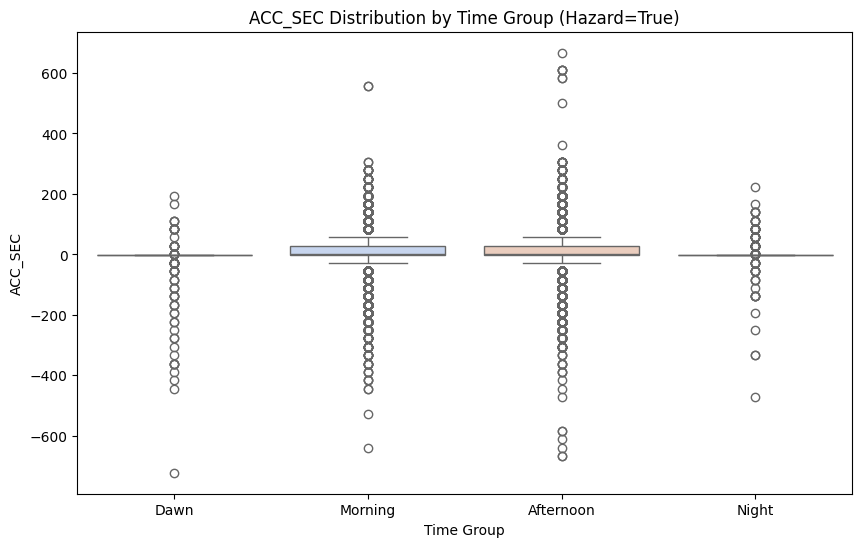

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\880964758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Time_Group', y=col, palette='coolwarm')


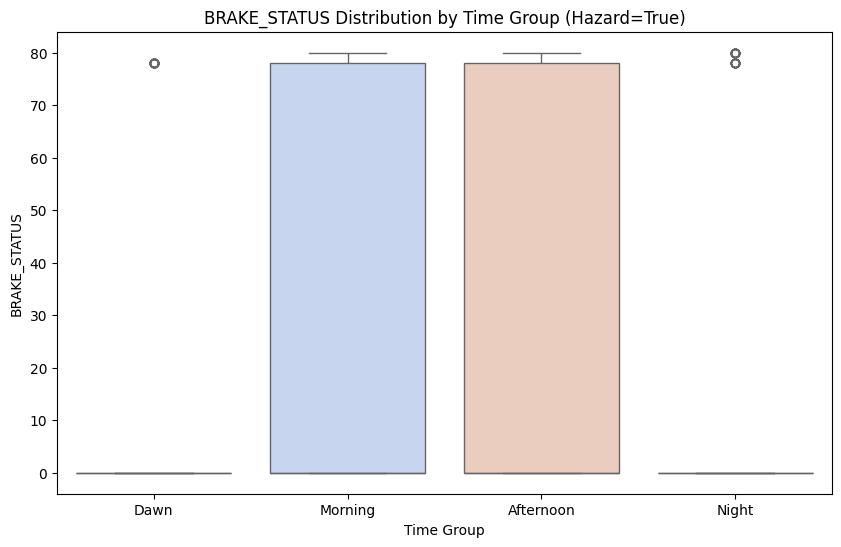

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\880964758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Time_Group', y=col, palette='coolwarm')


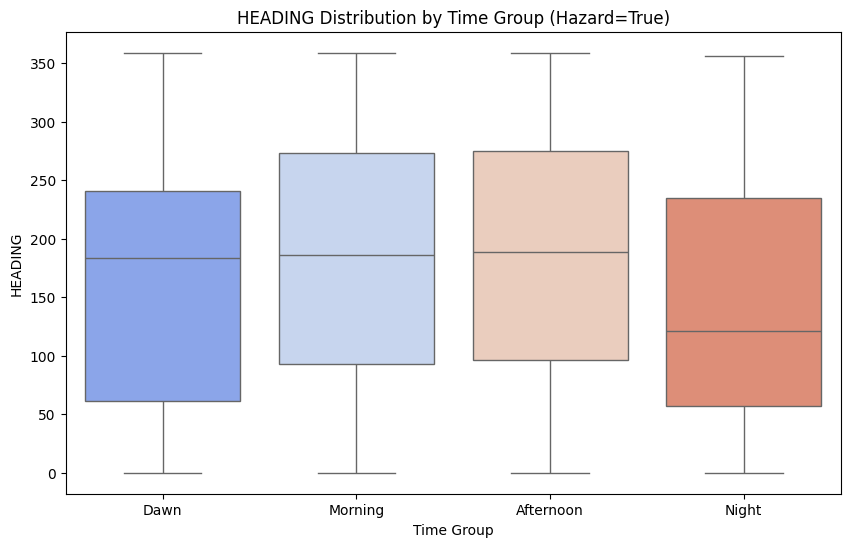

In [41]:
# Hazard=True인 데이터만 필터링
# Time_Group과 Hour 칼럼을 추가했으므로 업데이트
hazard_true_data = df[df['Hazard'] == True]

# 주요 칼럼 리스트
columns_to_plot = ['SPEED', 'ACC_SEC', 'BRAKE_STATUS', 'HEADING']

# Boxplot 생성
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=hazard_true_data, x='Time_Group', y=col, palette='coolwarm')
    plt.title(f'{col} Distribution by Time Group (Hazard=True)')
    plt.xlabel('Time Group')
    plt.ylabel(col)
    plt.show()

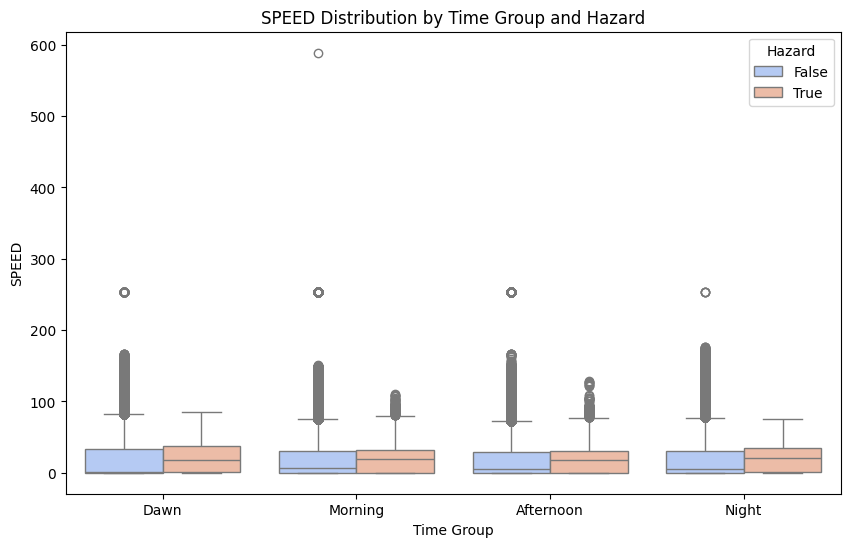

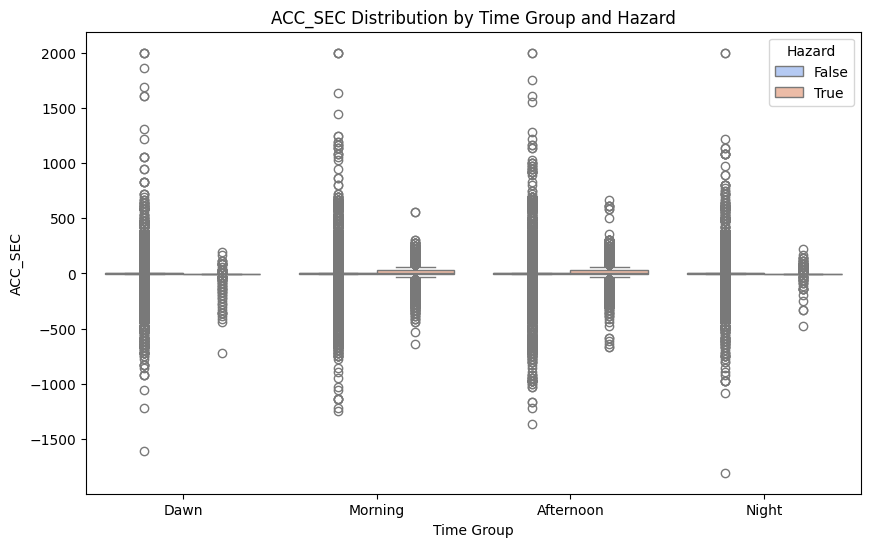

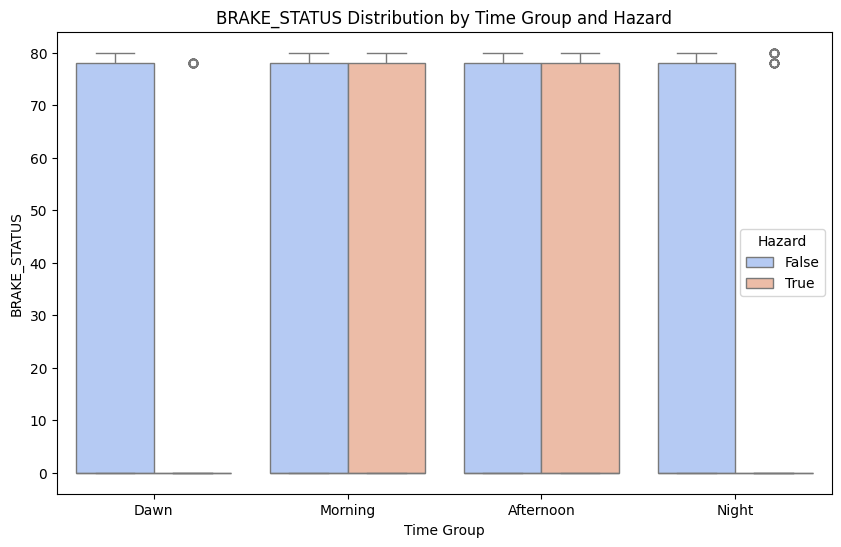

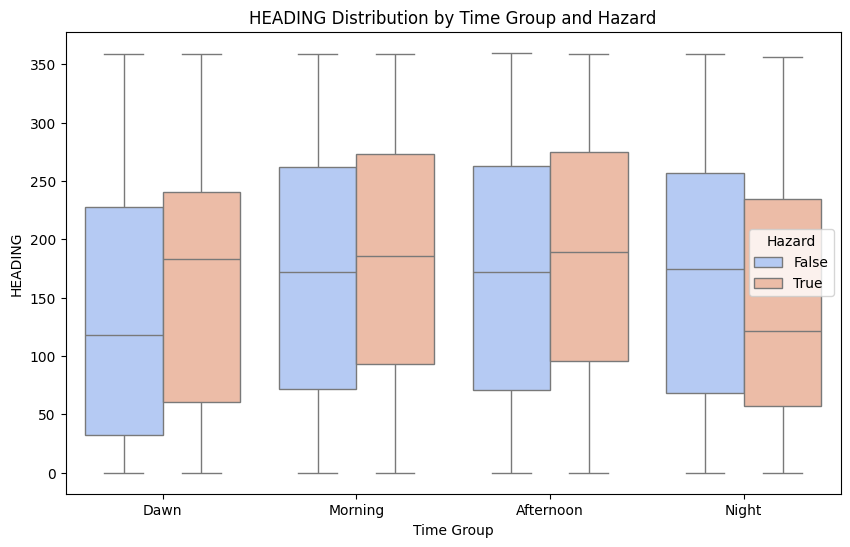

In [42]:
# Boxplot 생성 (시간대별 Hazard 발생 여부)
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Time_Group', y=col, hue='Hazard', palette='coolwarm')
    plt.title(f'{col} Distribution by Time Group and Hazard')
    plt.xlabel('Time Group')
    plt.ylabel(col)
    plt.legend(title='Hazard')
    plt.show()

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\1200976658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Month', y=col, palette='coolwarm')


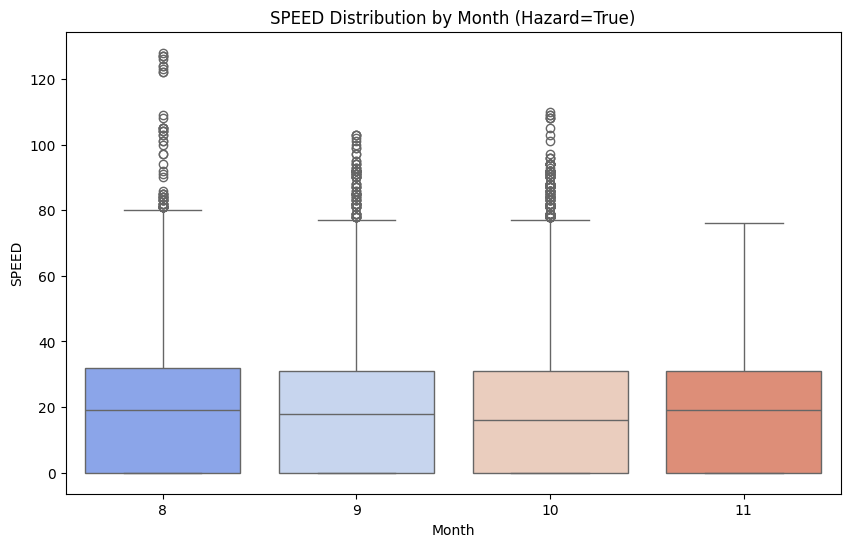

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\1200976658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Month', y=col, palette='coolwarm')


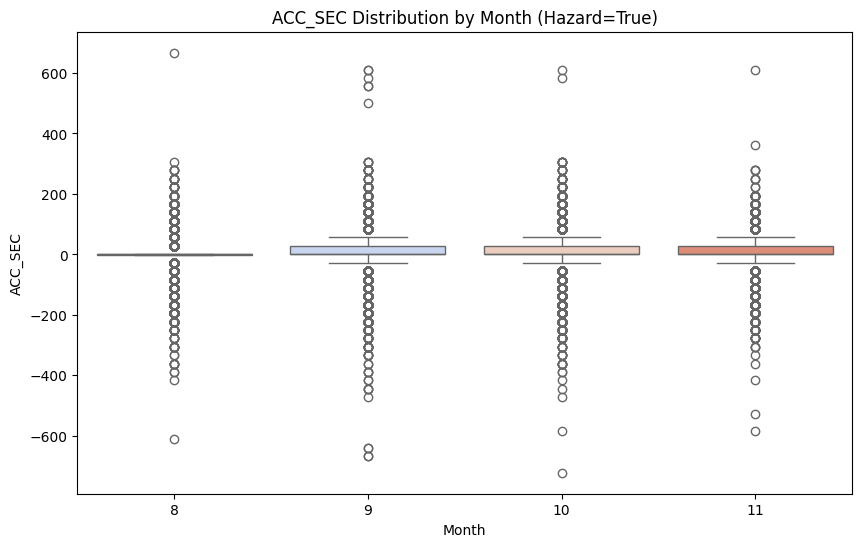

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\1200976658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Month', y=col, palette='coolwarm')


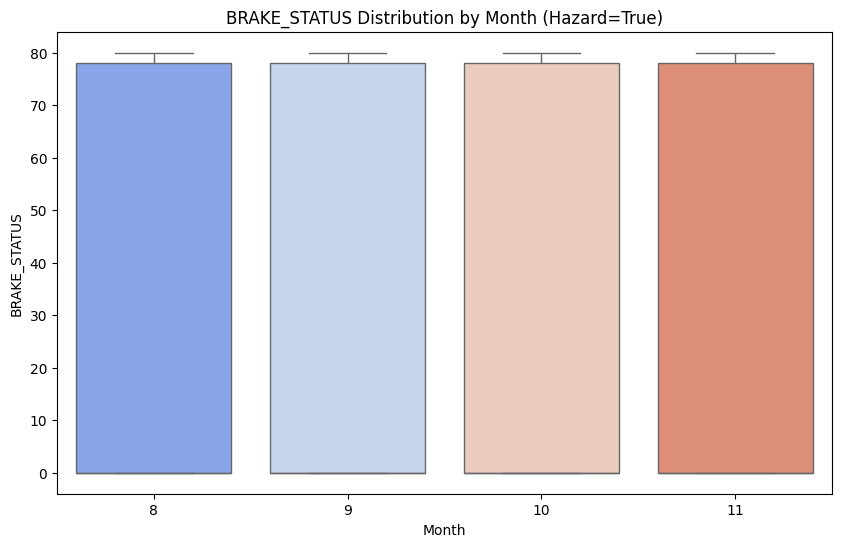

C:\Users\PEJ\AppData\Local\Temp\ipykernel_12684\1200976658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hazard_true_data, x='Month', y=col, palette='coolwarm')


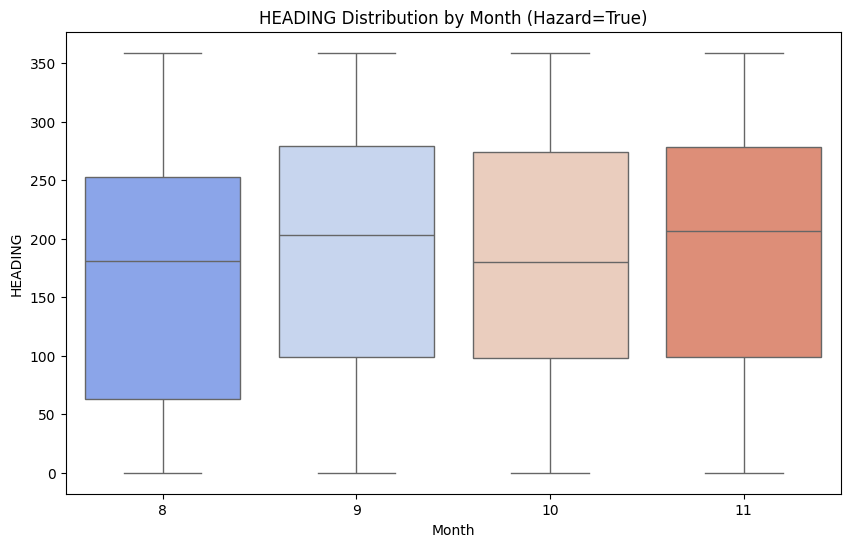

In [43]:
# Boxplot 생성 (월별 돌발 상황 발생)
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=hazard_true_data, x='Month', y=col, palette='coolwarm')
    plt.title(f'{col} Distribution by Month (Hazard=True)')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.show()

### **차량 이동 경로 시각화**

In [68]:
hazard_true_sample = df[df['Hazard'] == True]['Path'].head(1) # 돌발 상황 샘플
hazard_false_sample = df[df['Hazard'] == False]['Path'].head(1) # 정상 주행 샘플
print(f'돌발 상황 발생 데이터 : {hazard_true_sample}')
print(f'돌발 상황 미발생 데이터 : {hazard_false_sample}')

print('===========================')

turn_right_sample = df[df['Turn'] == 'Right']['Path'].head(1) # 우회전 샘플
turn_left_sample = df[df['Turn'] == 'Left']['Path'].head(1) # 좌회전 샘플
turn_reverse_sample = df[df['Turn'] == 'Reverse']['Path'].head(1) # 유턴 샘플
print(f'우회전 데이터 : {turn_right_sample}')
print(f'좌회전 데이터 : {turn_left_sample}')
print(f'유턴 데이터 : {turn_reverse_sample}')

print('============================')

Hbrk_sample = df[df['Speed'] == 'Hbrk']['Path'].head(1) # 급감속 샘플
Acc_sample = df[df['Speed'] == 'Acc']['Path'].head(1) # 급가속 샘플
print(f'급감속 데이터 : {Hbrk_sample}')
print(f'급가속 데이터 : {Acc_sample}')

돌발 상황 발생 데이터 : 490    V_220902_C_A_A4ED90F2_066801.csv
Name: Path, dtype: object
돌발 상황 미발생 데이터 : 0    V_220911_C_A_FFE80BAA_000433.csv
Name: Path, dtype: object
우회전 데이터 : 480    V_220922_C_A_FFE80F14_000039.csv
Name: Path, dtype: object
좌회전 데이터 : 310    V_221105_C_F_FFE80D41_000008.csv
Name: Path, dtype: object
유턴 데이터 : 4320    V_220824_S_N_FAC7AAA8_023411.csv
Name: Path, dtype: object
급감속 데이터 : 3150    V_221105_C_F_FFE8119C_000130.csv
Name: Path, dtype: object
급가속 데이터 : 2180    V_220819_S_N_FFE80A0B_164051.csv
Name: Path, dtype: object


In [62]:
import folium
from folium import plugins

def create_map(data, path_name, output_file):
    """
    특정 Path 데이터를 지도에 시각화하여 HTML 파일로 저장
    
    Parameters:
    - data: pandas DataFrame (Path에 해당하는 데이터)
    - path_name: str (Path 이름)
    - output_file: str (생성될 HTML 파일 이름)
    """
    # 지도 초기화 (Path 데이터의 첫 좌표를 중심으로 설정)
    center_lat = data['LATITUDE'].iloc[0]
    center_lon = data['LONGITUDE'].iloc[0]
    m = folium.Map(location=[center_lat, center_lon], zoom_start=15)

    # 경로 추가
    path_coords = list(zip(data['LATITUDE'], data['LONGITUDE']))
    folium.PolyLine(path_coords, color='blue', weight=5, opacity=0.7).add_to(m)

    # 각 점에 마커 추가
    for lat, lon in path_coords:
        folium.CircleMarker(location=[lat, lon], radius=3, color='red', fill=True).add_to(m)
        
    # 시작점 강조 마커 추가
    start_lat, start_lon = path_coords[0]
    folium.Marker(
        location=[start_lat, start_lon],
        popup="Start Point",
        icon=folium.Icon(color="green", icon="info-sign")  # 초록색 큰 마커
    ).add_to(m)
    
    # 지도 저장
    m.save(output_file)
    print(f"Map for {path_name} saved as {output_file}")

In [95]:
# 1. 돌발 상황 발생 데이터
hazard_path = "V_220902_C_A_A4ED90F2_066801.csv"
hazard_data = df[df['Path'] == hazard_path]
create_map(hazard_data, hazard_path, "map/hazard_event_map.html")

# 2. 정상 주행 상황 데이터
no_hazard_path = "V_220911_C_A_FFE80BAA_000433.csv"
no_hazard_data = df[df['Path'] == no_hazard_path]
create_map(no_hazard_data, no_hazard_path, "map/no_hazard_event_map.html")

# 3. 우회전 데이터
right_turn_path = "V_220922_C_A_FFE80F14_000039.csv"
right_turn_data = df[df['Path'] == right_turn_path]
create_map(right_turn_data, right_turn_path, "map/right_turn_map.html")

# 4. 좌회전 데이터
left_turn_path = "V_221105_C_F_FFE80D41_000008.csv"
left_turn_data = df[df['Path'] == left_turn_path]
create_map(left_turn_data, left_turn_path, "map/left_turn_map.html")

# 5. 유턴 데이터
u_turn_path = "V_220816_C_A_FFE80E95_000181.csv"
u_turn_data = df[df['Path'] == u_turn_path]
create_map(u_turn_data, u_turn_path, "map/u_turn_map.html")

# 6. 급감속 데이터
hard_brake_path = "V_221105_C_F_FFE8119C_000130.csv"
hard_brake_data = df[df['Path'] == hard_brake_path]
create_map(hard_brake_data, hard_brake_path, "map/hard_brake_map.html")

# 7. 급가속 데이터
acc_path = "V_221129_C_D_A93E1C22_059720.csv"
acc_data = df[df['Path'] == acc_path]
create_map(acc_data, acc_path, "map/acc_map.html")

Map for V_220902_C_A_A4ED90F2_066801.csv saved as map/hazard_event_map.html
Map for V_220911_C_A_FFE80BAA_000433.csv saved as map/no_hazard_event_map.html
Map for V_220922_C_A_FFE80F14_000039.csv saved as map/right_turn_map.html
Map for V_221105_C_F_FFE80D41_000008.csv saved as map/left_turn_map.html
Map for V_220816_C_A_FFE80E95_000181.csv saved as map/u_turn_map.html
Map for V_221105_C_F_FFE8119C_000130.csv saved as map/hard_brake_map.html
Map for V_221129_C_D_A93E1C22_059720.csv saved as map/acc_map.html


In [101]:
# 데이터 프레임을 이미지로 저장
col_list = ['ISSUE_DATE', 'LONGITUDE', 'LATITUDE', 'VEHICLE_TYPE', 'HEADING','SPEED', 'BRAKE_STATUS', 'ACC_SEC', 'CURRENT_LANE']
lab_list = ['Turn', 'Lane', 'Speed', 'Hazard']

# 돌발 상황 데이터
dfi.export(hazard_data[col_list], './img/hazard_data.png', max_cols = -1, max_rows = -1)
dfi.export(hazard_data[lab_list], './img/hazard_label.png', max_cols = -1, max_rows = -1)

# 정상 주행 상황 데이터
dfi.export(no_hazard_data[col_list], './img/no_hazard_data.png', max_cols = -1, max_rows = -1)
dfi.export(no_hazard_data[lab_list], './img/no_hazard_label.png', max_cols = -1, max_rows = -1)

# 우회전 데이터
dfi.export(right_turn_data[col_list], './img/right_turn_data.png', max_cols = -1, max_rows = -1)
dfi.export(right_turn_data[lab_list], './img/right_turn_label.png', max_cols = -1, max_rows = -1)

# 좌회전 데이터
dfi.export(left_turn_data[col_list], './img/left_turn_data.png', max_cols = -1, max_rows = -1)
dfi.export(left_turn_data[lab_list], './img/left_turn_label.png', max_cols = -1, max_rows = -1)

# 유턴 데이터
dfi.export(u_turn_data[col_list], './img/u_turn_data.png', max_cols = -1, max_rows = -1)
dfi.export(u_turn_data[lab_list], './img/u_turn_label.png', max_cols = -1, max_rows = -1)

# 급감속 데이터
dfi.export(hard_brake_data[col_list], './img/hard_brake_data.png', max_cols = -1, max_rows = -1)
dfi.export(hard_brake_data[lab_list], './img/hard_brake_label.png', max_cols = -1, max_rows = -1)

# 급가속 데이터
dfi.export(acc_data[col_list], './img/acc_data.png', max_cols = -1, max_rows = -1)
dfi.export(acc_data[lab_list], './img/acc_label.png', max_cols = -1, max_rows = -1)